# Analysis on NFL passing statistics, 2006-2022

- Passing yards
- Passing touchdowns
- Passing attempts

- Rushing data

- Total points scored

In [173]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pd.options.display.max_columns = 100
pd.options.display.max_rows = 100

sns.set_theme(context='notebook', style='darkgrid')

In [206]:
# color palette
palette = sns.color_palette(palette='icefire', n_colors=15)
palette

[(0.56349779, 0.78357215, 0.81834861),
 (0.37523981, 0.67057537, 0.80420832),
 (0.23526251, 0.54739477, 0.8115939),
 (0.25423116, 0.40433127, 0.78155831),
 (0.28233561, 0.28527482, 0.58742866),
 (0.2156198, 0.20755389, 0.36125301),
 (0.14577095, 0.14327403, 0.19720829),
 (0.12284806, 0.1179729, 0.11772022),
 (0.21394877, 0.12718055, 0.14472604),
 (0.36178937, 0.1589124, 0.20807639),
 (0.54159776, 0.17898292, 0.26226847),
 (0.72401436, 0.20691287, 0.25027366),
 (0.85648867, 0.32358058, 0.20415327),
 (0.93073701, 0.49341219, 0.25065486),
 (0.96809871, 0.66971662, 0.45830232)]

In [88]:
# load offensive totals
offense = pd.read_csv('../nfl_data/offense_totals.csv').drop(['Rk', 'Tms'], axis=1)

# drop current (incomplete) season
offense = offense.drop(0, axis=0)

# rename cols
offense.columns = ['year', 'tot_points', 'tot_yds', 'off_plays', 'yds_play', 'to_lost', 'fumb_lost', 'fd', 'pass_cmp', 
                  'pass_att', 'pass_yds', 'pass_td', 'int', 'pass_n_yds_att', 'pass_fd', 'rush_att', 'rush_yds', 'rush_td', 
                  'rush_yds_att', 'rush_fd', 'pen_acc', 'pen_yds', 'pen_fd', 'drives', 'sc%', 'to%', 'plays_drive', 
                  'yds_drive', 'pts_drive']

In [89]:
# load offensive passing
passing = pd.read_csv('../nfl_data/passing_totals.csv').drop(['Rk', 'Tms'], axis=1)

# drop current (incomplete) season
passing = passing.drop(0, axis=0)

# rename cols
passing.columns = ['year', 'pass_cmp', 'pass_att', 'pass_cmp%', 'pass_yds', 'pass_td', 'pass_td%', 'int', 'int%', 
                   'pass_yds_att', 'pass_adj_yds_a', 'pass_yds_cmp', 'pass_yds_gm', 'pass_rate', 'sk', 'sk_yds', 'sk%', 
                   'pass_n_yds_att', 'pass_adj_n_yds_att']

In [118]:
# some of the passing stats columns are identical
identical_columns = offense.columns.intersection(passing.columns)

# dropping identical columns from the second dataframe
passing_dropped = passing.drop(columns=identical_columns)

# merge the two dataframes
df = pd.merge(offense, passing_dropped, left_index=True, right_index=True)

In [119]:
offense.shape, passing.shape, totals.shape

((17, 29), (17, 19), (17, 41))

In [120]:
# 2018-2022 seasons
df.head()

,year,tot_points,tot_yds,off_plays,yds_play,to_lost,fumb_lost,fd,pass_cmp,pass_att,pass_yds,pass_td,int,pass_n_yds_att,pass_fd,rush_att,rush_yds,rush_td,rush_yds_att,rush_fd,pen_acc,pen_yds,pen_fd,drives,sc%,to%,plays_drive,yds_drive,pts_drive,pass_cmp%,pass_td%,int%,pass_yds_att,pass_adj_yds_a,pass_yds_cmp,pass_yds_gm,pass_rate,sk,sk_yds,sk%,pass_adj_n_yds_att
1,2022,11860,184332,34136,5.4,710,292,10666,11605,18069,118438,750,418,6.1,6087,14770,65894,487,4.5,3686,3032,24976,893,5906,36.2,11.3,5.95,31.1,1.92,64.2,4.2,2.3,7.0,6.8,10.9,218.5,89.1,1297,8597,6.7,5.9
2,2021,12502,186897,34449,5.4,706,266,11056,12121,18712,124203,840,440,6.2,6440,14493,62694,505,4.3,3634,3217,27749,982,5874,37.8,11.5,6.04,31.7,2.05,64.8,4.5,2.4,7.1,6.9,11.0,228.3,90.8,1244,8597,6.2,6.1
3,2020,12692,183825,32945,5.6,665,270,11106,11756,18018,122957,871,395,6.4,6546,13792,60868,532,4.4,3561,2876,24914,999,5567,39.8,11.4,6.09,32.9,2.20,65.2,4.8,2.2,7.2,7.2,11.1,240.2,93.6,1135,7543,5.9,6.4
4,2019,11680,178107,32516,5.5,711,301,10369,11331,17853,120301,797,410,6.3,6200,13387,57806,447,4.3,3115,3451,29306,1054,5728,35.7,11.8,5.85,31.0,1.94,63.5,4.5,2.3,7.2,7.1,11.4,235.0,90.4,1276,8610,6.7,6.2
5,2018,11952,180338,32224,5.6,696,277,10462,11462,17671,121737,847,419,6.4,6276,13272,58601,439,4.4,3206,3445,29423,980,5740,36.5,11.8,5.80,31.4,2.00,64.9,4.8,2.4,7.4,7.3,11.4,237.8,92.9,1281,8530,6.8,6.3


# Correlation

In [93]:
# correlation matrix
corr = df.corr()

# replace values where the absolute correlation is less than 0.6 with NaN
corr[abs(corr) < 0.6] = np.nan

In [104]:
corr.shape

(40, 40)

In [109]:
corr.iloc[:20, :20].shape

(20, 20)

In [110]:
corr.iloc[20:, 20:].shape

(20, 20)

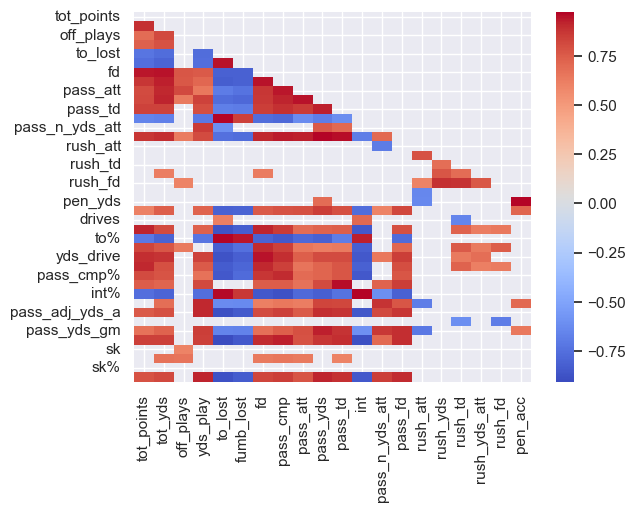

In [113]:
# mask for the upper triangle
mask = np.triu(np.ones_like(corr.iloc[:, :20]))

# show correlation heatmap for first 20 cols
sns.heatmap(corr.iloc[:, :20], mask=mask, cmap='coolwarm');

# Visualizations

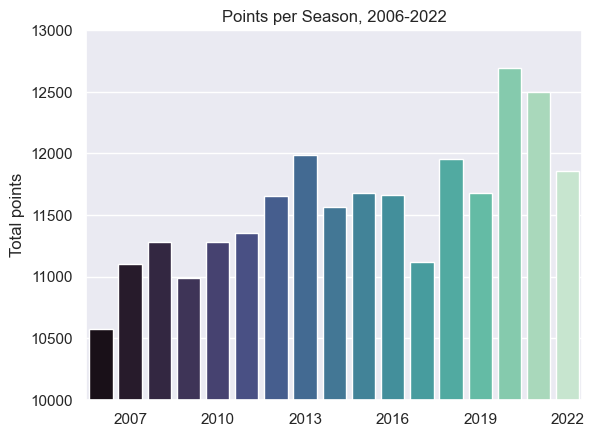

In [237]:
# show distribution of points scored
sns.barplot(df, x='year', y='tot_points', palette='mako')

plt.title('Points per Season, 2006-2022')
plt.ylabel('Total points')
plt.xlabel('')

plt.ylim((10000, 13000))
plt.xticks([1, 4, 7, 10, 13, 16]);

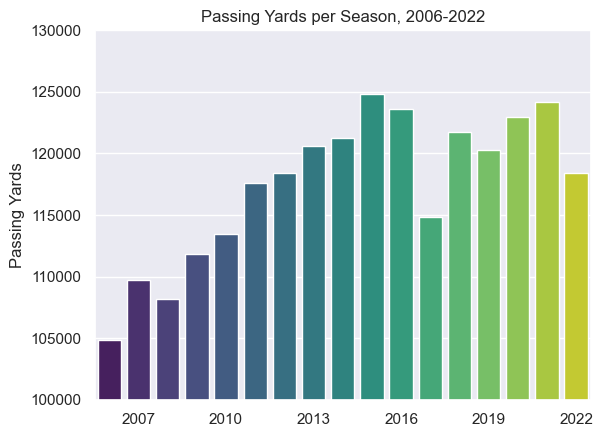

In [234]:
# show distribution of pass yds
sns.barplot(df, x='year', y='pass_yds', palette='viridis')

plt.title('Passing Yards per Season, 2006-2022')
plt.ylabel('Passing Yards')
plt.xlabel('')

plt.ylim((100000, 130000))
plt.xticks([1, 4, 7, 10, 13, 16]);

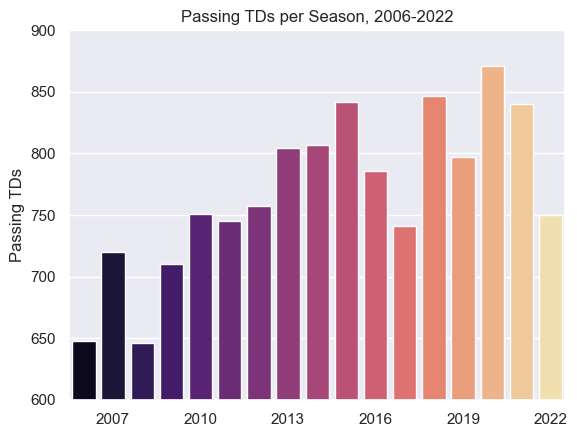

In [245]:
# show distribution of pass TDs
sns.barplot(df, x='year', y='pass_td', palette='magma')

plt.title('Passing TDs per Season, 2006-2022')
plt.ylabel('Passing TDs')
plt.xlabel('')

plt.ylim((600, 900))
plt.xticks([1, 4, 7, 10, 13, 16]);

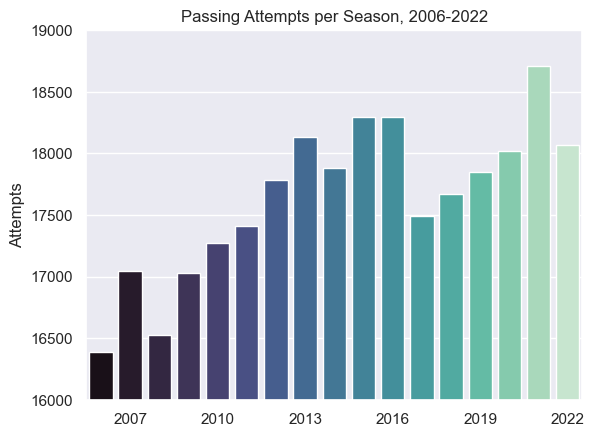

In [246]:
# show distribution of passing attempts
sns.barplot(df, x='year', y='pass_att', palette='mako')

plt.title('Passing Attempts per Season, 2006-2022')
plt.ylabel('Attempts')
plt.xlabel('')

plt.ylim((16000, 19000))
plt.xticks([1, 4, 7, 10, 13, 16]);

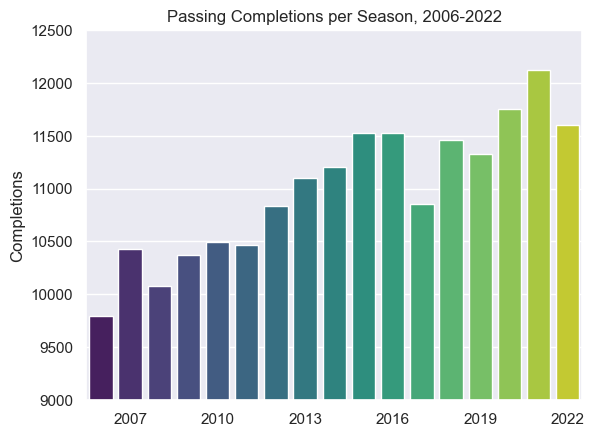

In [259]:
# show distribution of passing completions
sns.barplot(df, x='year', y='pass_cmp', palette='viridis')

plt.title('Passing Completions per Season, 2006-2022')
plt.ylabel('Completions')
plt.xlabel('')

plt.ylim((9000, 12500))
plt.xticks([1, 4, 7, 10, 13, 16]);

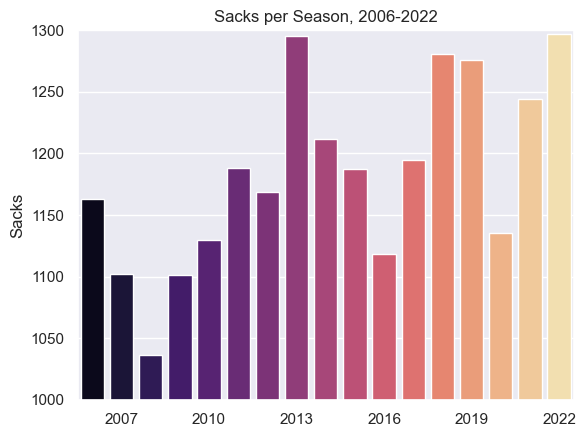

In [244]:
# show distribution of sacks
sns.barplot(df, x='year', y='sk', palette='magma')

plt.title('Sacks per Season, 2006-2022')
plt.ylabel('Sacks')
plt.xlabel('')

plt.ylim((1000, 1300))
plt.xticks([1, 4, 7, 10, 13, 16]);

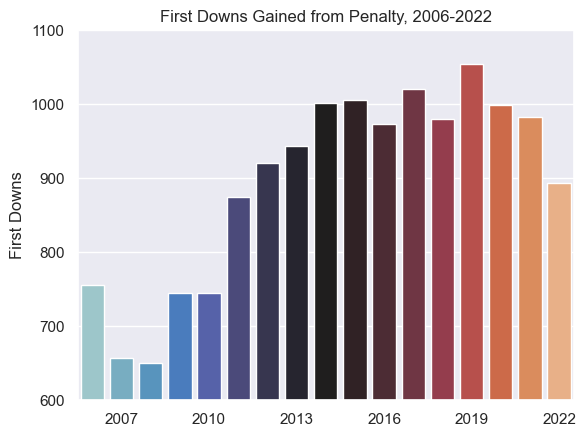

In [260]:
# show distribution of penalty yards
sns.barplot(df, x='year', y='pen_fd', palette='icefire')

plt.title('First Downs Gained from Penalty, 2006-2022')
plt.ylabel('First Downs')
plt.xlabel('')

plt.ylim((600, 1100))
plt.xticks([1, 4, 7, 10, 13, 16]);

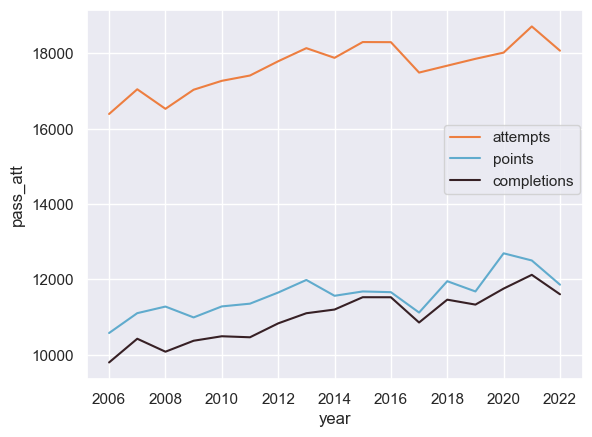

In [238]:
sns.lineplot(df, x='year', y='pass_att', label='attempts', color=palette[13])
sns.lineplot(df, x='year', y='tot_points', label='points', color=palette[1])
sns.lineplot(df, x='year', y='pass_cmp', label='completions', color=palette[8])

plt.legend(loc=(0.72, 0.5));

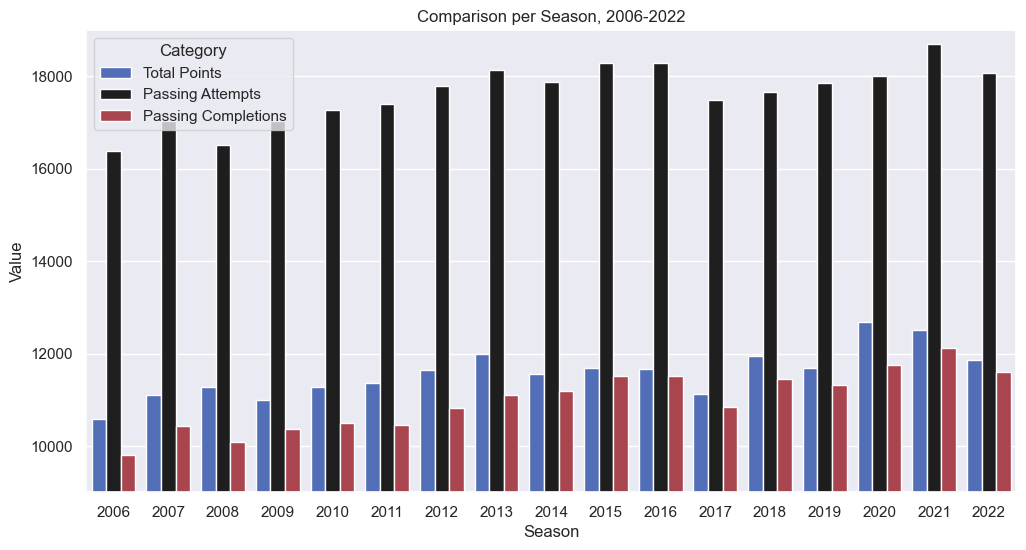

In [239]:
# long-form dataframe
df_melted = df.melt(id_vars='year', value_vars=['tot_points', 'pass_att', 'pass_cmp'], 
                    var_name='category', value_name='value')

# Create a custom category column for proper labeling
category_mapping = {
    'tot_points': 'Total Points',
    'pass_att': 'Passing Attempts',
    'pass_cmp': 'Passing Completions'
}

df_melted['category'] = df_melted['category'].map(category_mapping)

# Create the side-by-side bar plot
plt.figure(figsize=(12, 6))
sns.barplot(data=df_melted, x='year', y='value', hue='category', palette='icefire')

plt.ylim((9000, 19000))

plt.title('Comparison per Season, 2006-2022')
plt.ylabel('Value')
plt.xlabel('Season')
plt.legend(title='Category')
plt.show()

- In general, points scored, attempts, and completions have all seen a steady increase over the last 17 seasons.

In [222]:
df

,year,tot_points,tot_yds,off_plays,yds_play,to_lost,fumb_lost,fd,pass_cmp,pass_att,pass_yds,pass_td,int,pass_n_yds_att,pass_fd,rush_att,rush_yds,rush_td,rush_yds_att,rush_fd,pen_acc,pen_yds,pen_fd,drives,sc%,to%,plays_drive,yds_drive,pts_drive,pass_cmp%,pass_td%,int%,pass_yds_att,pass_adj_yds_a,pass_yds_cmp,pass_yds_gm,pass_rate,sk,sk_yds,sk%,pass_adj_n_yds_att
1,2022,11860,184332,34136,5.4,710,292,10666,11605,18069,118438,750,418,6.1,6087,14770,65894,487,4.5,3686,3032,24976,893,5906,36.2,11.3,5.95,31.1,1.92,64.2,4.2,2.3,7.0,6.8,10.9,218.5,89.1,1297,8597,6.7,5.9
2,2021,12502,186897,34449,5.4,706,266,11056,12121,18712,124203,840,440,6.2,6440,14493,62694,505,4.3,3634,3217,27749,982,5874,37.8,11.5,6.04,31.7,2.05,64.8,4.5,2.4,7.1,6.9,11.0,228.3,90.8,1244,8597,6.2,6.1
3,2020,12692,183825,32945,5.6,665,270,11106,11756,18018,122957,871,395,6.4,6546,13792,60868,532,4.4,3561,2876,24914,999,5567,39.8,11.4,6.09,32.9,2.20,65.2,4.8,2.2,7.2,7.2,11.1,240.2,93.6,1135,7543,5.9,6.4
4,2019,11680,178107,32516,5.5,711,301,10369,11331,17853,120301,797,410,6.3,6200,13387,57806,447,4.3,3115,3451,29306,1054,5728,35.7,11.8,5.85,31.0,1.94,63.5,4.5,2.3,7.2,7.1,11.4,235.0,90.4,1276,8610,6.7,6.2
5,2018,11952,180338,32224,5.6,696,277,10462,11462,17671,121737,847,419,6.4,6276,13272,58601,439,4.4,3206,3445,29423,980,5740,36.5,11.8,5.80,31.4,2.00,64.9,4.8,2.4,7.4,7.3,11.4,237.8,92.9,1281,8530,6.8,6.3
6,2017,11120,171040,32438,5.3,706,276,9860,10856,17488,114870,741,430,6.1,5921,13755,56170,380,4.1,2919,3420,29580,1020,5903,33.8,11.4,5.69,28.9,1.78,62.1,4.2,2.5,7.0,6.8,11.3,224.4,86.9,1195,7810,6.4,5.9
7,2016,11661,179402,32734,5.5,700,285,10379,11526,18295,123639,786,415,6.4,6368,13321,55763,443,4.2,3038,3447,29695,973,5853,35.6,11.3,5.77,30.6,1.91,63.0,4.3,2.3,7.2,7.0,11.4,241.5,89.3,1118,7225,5.8,6.2
8,2015,11680,180560,32973,5.5,746,310,10268,11527,18298,124836,842,436,6.4,6289,13488,55724,365,4.1,2973,3545,30148,1006,5967,34.3,11.7,5.69,30.2,1.84,63.0,4.6,2.4,7.3,7.1,11.5,243.8,90.2,1187,7853,6.1,6.3
9,2014,11565,178249,32779,5.4,758,308,10255,11200,17879,121247,807,450,6.4,6288,13688,57002,380,4.2,2965,3386,28428,1002,5911,34.1,12.1,5.71,30.1,1.83,62.6,4.5,2.5,7.2,7.0,11.5,236.8,88.9,1212,7651,6.3,6.1
10,2013,11985,178421,33302,5.4,814,312,10212,11102,18136,120626,804,502,6.2,6210,13871,57795,410,4.2,3059,3134,27038,943,6143,33.8,12.5,5.58,29.0,1.81,61.2,4.4,2.8,7.1,6.8,11.6,235.6,86.0,1295,8551,6.7,5.9


# Export data

- adj yards / attempt = (yds + (20 * td) - (45 * int)) / attempts
- net yards / attempt = (passing yds - sack yds lost) / (attempts + sacks)

In [257]:
# export stats
df.to_csv('../nfl_data/totals.csv')